# Building Neural Networks from Scratch

**TA:** Danwei Yao  
**Course:** BIOS 534  
**Institution:** Emory University  
**Semester:** Spring 2026

---

This notebook provides a comprehensive introduction to building neural networks from scratch using PyTorch. We'll start with the fundamentals of tensors and gradually build up to fully connected neural networks and convolutional neural networks.

## Learning Objectives

By the end of this notebook, you will be able to:
- Understand and work with tensors (the fundamental data structure in deep learning)
- Perform tensor operations and manipulations
- Build a fully connected neural network from scratch
- Implement a convolutional neural network (CNN) for image classification
- Apply these concepts to real datasets like MNIST or CIFAR-10

## Part 1: Tensor Fundamentals

### What is a Tensor?

A **tensor** is a fundamental data structure in deep learning and PyTorch. Think of it as a generalization of arrays and matrices:

- **0D tensor (scalar)**: A single number (e.g., `5`)
- **1D tensor (vector)**: A list of numbers (e.g., `[1, 2, 3]`)
- **2D tensor (matrix)**: A 2D array of numbers (e.g., `[[1, 2], [3, 4]]`)
- **3D tensor**: A 3D array (e.g., a batch of images)
- **nD tensor**: An n-dimensional array

**Key Properties of Tensors:**
- **Shape**: The dimensions of the tensor (e.g., `[2, 3]` means 2 rows, 3 columns)
- **Dtype**: The data type (e.g., `float32`, `int64`)
- **Device**: Where the tensor is stored (`cpu` or `cuda` for GPU)

Tensors are the building blocks of neural networks - all data (inputs, weights, biases, outputs) are represented as tensors. Understanding tensor operations is crucial for understanding how neural networks work.

In [74]:
import torch
import numpy as np
print(f"pytorch version: {torch.__version__}")
print(f"numpy version: {np.__version__}")

pytorch version: 2.2.0
numpy version: 1.26.4


In [75]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cpu


### 1.1 Creating & Inspecting Tensors

Let's start by creating tensors and understanding their properties. This is the foundation for all neural network operations.

In [76]:
# Creating Tensors from Python lists/arrays
# dtype specifies the data type (float32 is common for neural networks)
# device specifies where to store the tensor (CPU or GPU)
my_tensor = torch.tensor([[1, 2, 3], 
                          [4, 5, 6]], 
                         dtype=torch.float32,
                         device=device)

print("Tensor contents:")
print(my_tensor)
print("-----------------")
print("Data type:", my_tensor.dtype)
print("-----------------")
print("Shape (dimensions):", my_tensor.shape)
print("-----------------")
print("Size (same as shape):", my_tensor.size())  # identical to tensor.shape
print("-----------------")

Tensor contents:
tensor([[1., 2., 3.],
        [4., 5., 6.]])
-----------------
Data type: torch.float32
-----------------
Shape (dimensions): torch.Size([2, 3])
-----------------
Size (same as shape): torch.Size([2, 3])
-----------------


In [77]:
# Common tensor creation functions
# These are useful for initializing weights, biases, and data

print("Zeros tensor (2x3):")
print(torch.zeros(2,3))
print("\nOnes tensor (2x1):")
print(torch.ones(2,1))
print("\nRandom normal tensor (3x3) - commonly used for weight initialization:")
print(torch.randn(3,3))
print("\nArange (sequence from 0 to 9):")
print(torch.arange(0,10))
print("\nLinspace (5 evenly spaced values from 0 to 1):")
print(torch.linspace(0,1,5))

Zeros tensor (2x3):
tensor([[0., 0., 0.],
        [0., 0., 0.]])

Ones tensor (2x1):
tensor([[1.],
        [1.]])

Random normal tensor (3x3) - commonly used for weight initialization:
tensor([[-0.6905, -0.8643,  0.1755],
        [-0.0967,  0.6429,  0.7682],
        [ 0.7830,  0.1526, -1.2400]])

Arange (sequence from 0 to 9):
tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Linspace (5 evenly spaced values from 0 to 1):
tensor([0.0000, 0.2500, 0.5000, 0.7500, 1.0000])


In [83]:
# Tensor reshaping operations
# These are crucial for preparing data for neural network layers
x = torch.randn(3,4)

print("Original shape:", x.shape)        # Check current dimensions
print("\nReshape to 1D (12 elements):")
print(x.view(12))    # Reshape without copying data (must preserve total elements)
print("\nAdd dimension at position 0 (useful for batch dimension):")
print(x.unsqueeze(0)) # Add a dimension of size 1 at position 0
print("\nRemove dimensions of size 1:")
print(x.squeeze())    # Remove all dimensions of size 1

Original shape: torch.Size([3, 4])

Reshape to 1D (12 elements):
tensor([ 0.6659,  0.5391, -0.0163, -0.2444,  0.4342, -1.6801, -2.1366, -2.3795,
        -1.2885, -1.8933,  1.8396, -1.5779])

Add dimension at position 0 (useful for batch dimension):
tensor([[[ 0.6659,  0.5391, -0.0163, -0.2444],
         [ 0.4342, -1.6801, -2.1366, -2.3795],
         [-1.2885, -1.8933,  1.8396, -1.5779]]])

Remove dimensions of size 1:
tensor([[ 0.6659,  0.5391, -0.0163, -0.2444],
        [ 0.4342, -1.6801, -2.1366, -2.3795],
        [-1.2885, -1.8933,  1.8396, -1.5779]])


### 1.2 Indexing & Slicing

Indexing and slicing allow us to access specific elements or subsets of tensors. This is essential for:
- Extracting batches of data
- Accessing specific features or samples
- Manipulating tensor dimensions for neural network operations

In [79]:
print(x)

tensor([[-0.6958, -1.2464,  0.8707, -0.5863],
        [ 1.0891, -0.4524,  1.8724, -0.5776],
        [ 0.3891, -1.9188, -1.6634,  0.1297]])


In [80]:
# Indexing and slicing examples
# Similar to NumPy indexing
print("First row (index 0):")
print(x[0]) 
print("\nSecond column (all rows, column index 1):")
print(x[:,1]) 
print("\nFirst three rows (slice from 0 to 3):")
print(x[0:3]) 

# Adding batch dimension (common in neural networks)
# Neural networks typically expect data in batches: [batch_size, ...]
x = x.unsqueeze(0)
print("\nAfter adding batch dimension:")
print("Shape:", x.shape)  # Now shape is [1, 3, 4] - batch of 1, with 3x4 data

First row (index 0):
tensor([-0.6958, -1.2464,  0.8707, -0.5863])

Second column (all rows, column index 1):
tensor([-1.2464, -0.4524, -1.9188])

First three rows (slice from 0 to 3):
tensor([[-0.6958, -1.2464,  0.8707, -0.5863],
        [ 1.0891, -0.4524,  1.8724, -0.5776],
        [ 0.3891, -1.9188, -1.6634,  0.1297]])

After adding batch dimension:
Shape: torch.Size([1, 3, 4])


### 1.3 Tensor Operations

Tensor operations are the core of neural network computations. We'll cover:
- Element-wise operations
- Matrix multiplication (crucial for fully connected layers)
- Batch operations (essential for processing multiple samples)

In [81]:
# Element-wise operations
# Operations are performed element by element (must have compatible shapes)
x = torch.tensor([1, 3, 5])
y = torch.tensor([10, 8, 6])

# Addition (element-wise)
z = x + y
print("Element-wise addition:")
print(z)
print("-----------------")

# Multiplication (element-wise, NOT matrix multiplication)
print("Element-wise multiplication:")
z = x * y
print(z)
print("-----------------")

# Dot product (sum of element-wise products)
# This is a scalar result: x[0]*y[0] + x[1]*y[1] + x[2]*y[2]
print("Dot product (scalar result):")
z = torch.dot(x, y)
print(z)
print("-----------------")


Element-wise addition:
tensor([11, 11, 11])
-----------------
Element-wise multiplication:
tensor([10, 24, 30])
-----------------
Dot product (scalar result):
tensor(64)
-----------------


### 1.4 Broadcasting

Broadcasting allows operations between tensors of different shapes by automatically expanding dimensions. This is very useful in neural networks for operations like adding biases to all samples in a batch.

In [82]:
# Broadcasting example
# PyTorch automatically expands smaller tensors to match larger ones
x1 = torch.rand((3, 5))  # 3 rows, 5 columns
x2 = torch.rand((1, 5))  # 1 row, 5 columns

# x2 will be automatically broadcasted to (3, 5) by repeating the row 3 times
# Then element-wise subtraction is performed
# This is exactly how biases are added in neural networks!
z = x1 - x2
print("Original x1 shape:", x1.shape)
print("Original x2 shape:", x2.shape)
print("\nAfter broadcasting, x2 is treated as (3, 5)")
print("Resulting tensor:")
print(z)
print("Result shape:", z.shape)
print("\nNote: This is how we add a bias vector to all samples in a batch efficiently")

Original x1 shape: torch.Size([3, 5])
Original x2 shape: torch.Size([1, 5])

After broadcasting, x2 is treated as (3, 5)
Resulting tensor:
tensor([[ 0.0903,  0.2101,  0.0955,  0.3686, -0.2063],
        [ 0.0507, -0.5495, -0.0179,  0.8040, -0.5201],
        [ 0.3100,  0.1661,  0.0930,  0.9138, -0.6491]])
Result shape: torch.Size([3, 5])

Note: This is how we add a bias vector to all samples in a batch efficiently


---

## Summary: Tensor Fundamentals

**Key Takeaways:**
1. **Tensors** are multi-dimensional arrays - the fundamental data structure in deep learning
2. **Shape** determines how data is organized (batch, features, spatial dimensions)
3. **Operations** include element-wise ops, matrix multiplication, and broadcasting
4. **Reshaping** (view, unsqueeze, squeeze) is essential for preparing data for different layer types

**Next Steps:**
Now that we understand tensors, we'll use these concepts to build:
- A fully connected neural network layer
- A complete neural network for classification
- A convolutional neural network for image processing

---

## Part 2: Building a Fully Connected Neural Network

In this section, we'll build a complete neural network pipeline for the **Fashion-MNIST** dataset. This will demonstrate:
1. **Data Loading**: How to load and preprocess image data
2. **Model Framework**: Building a neural network using PyTorch's `nn.Module`
3. **Training**: Implementing the training loop with loss and optimization
4. **Testing**: Evaluating model performance on unseen data

### About Fashion-MNIST

Fashion-MNIST is a dataset of 70,000 grayscale images of 10 different clothing categories:
- T-shirt/top, Trouser, Pullover, Dress, Coat, Sandal, Shirt, Sneaker, Bag, Ankle boot

Each image is 28×28 pixels, making it perfect for learning neural networks!

### 2.1 Data Loading and Preprocessing

First, we need to import the necessary libraries and set up data loading. PyTorch provides convenient utilities for loading datasets.

In [52]:
# Import necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# Set random seed for reproducibility
torch.manual_seed(42)
np.random.seed(42)

print("Libraries imported successfully!")
print(f"PyTorch version: {torch.__version__}")
print(f"Device: {device}")

Libraries imported successfully!
PyTorch version: 2.2.0
Device: cpu


Now let's load the Fashion-MNIST dataset. We'll use PyTorch's built-in dataset and apply transformations to normalize the pixel values.

In [53]:
# Define transformations
# ToTensor() converts PIL images to tensors and scales pixel values to [0, 1]
# Normalize() scales values to have mean 0.5 and std 0.5 (range approximately [-1, 1])
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # Normalize to [-1, 1] range
])

# Load Fashion-MNIST dataset
# root: directory where data will be stored
# train: True for training set, False for test set
# download: automatically download if not present
# transform: apply transformations to images

train_dataset = torchvision.datasets.FashionMNIST(
    root='./data', 
    train=True, 
    download=True, 
    transform=transform
)

test_dataset = torchvision.datasets.FashionMNIST(
    root='./data', 
    train=False, 
    download=True, 
    transform=transform
)

print(f"Training samples: {len(train_dataset)}")
print(f"Test samples: {len(test_dataset)}")
print(f"Image shape: {train_dataset[0][0].shape}")  # [channels, height, width]
print(f"Number of classes: {len(train_dataset.classes)}")
print(f"Class names: {train_dataset.classes}")

100%|██████████| 26421880/26421880 [01:11<00:00, 368514.24it/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 264213.55it/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 4947214.14it/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 4633535.84it/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw

Training samples: 60000
Test samples: 10000
Image shape: torch.Size([1, 28, 28])
Number of classes: 10
Class names: ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


Let's visualize some samples from the dataset to understand what we're working with.

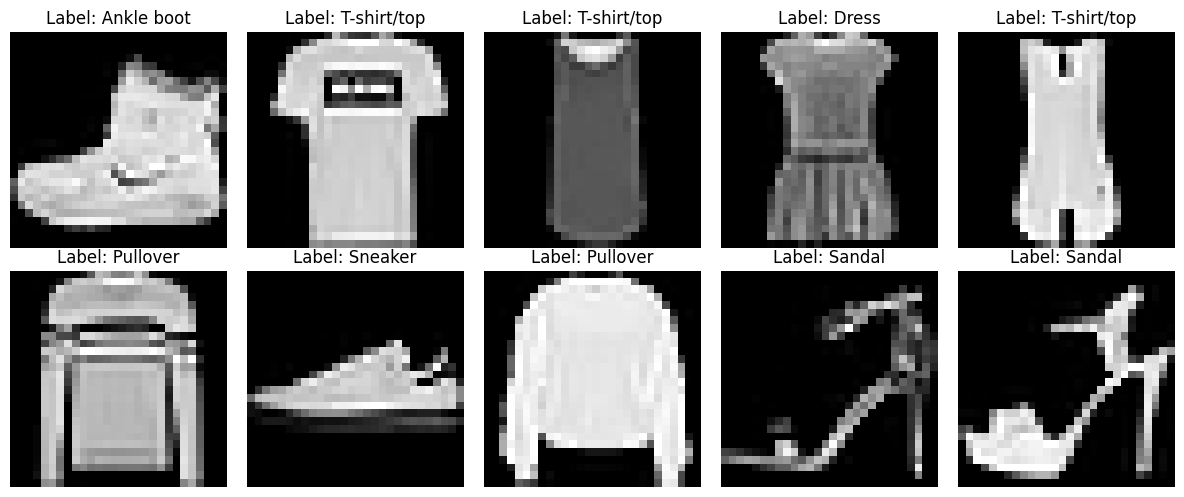

In [54]:
# Visualize some training samples
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
class_names = train_dataset.classes

for i in range(10):
    row, col = i // 5, i % 5
    image, label = train_dataset[i]
    
    # Denormalize for visualization (convert back from [-1, 1] to [0, 1])
    image = image * 0.5 + 0.5
    image = image.squeeze().numpy()  # Remove channel dimension and convert to numpy
    
    axes[row, col].imshow(image, cmap='gray')
    axes[row, col].set_title(f'Label: {class_names[label]}')
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()

Now we'll create DataLoaders to efficiently load data in batches during training. Batching allows us to process multiple samples simultaneously, which speeds up training.

In [55]:
# Create DataLoaders
# batch_size: number of samples processed together
# shuffle: randomize order of samples (True for training, False for testing)
batch_size = 64

train_loader = DataLoader(
    train_dataset, 
    batch_size=batch_size, 
    shuffle=True,
    num_workers=0  # Set to 0 for compatibility, increase for faster loading
)

test_loader = DataLoader(
    test_dataset, 
    batch_size=batch_size, 
    shuffle=False,
    num_workers=0
)

# Let's check what a batch looks like
data_iter = iter(train_loader)
images, labels = next(data_iter)

print(f"Batch shape: {images.shape}")  # [batch_size, channels, height, width]
print(f"Labels shape: {labels.shape}")  # [batch_size]
print(f"Image pixel range: [{images.min():.2f}, {images.max():.2f}]")
print(f"Sample labels: {labels[:10].numpy()}")

Batch shape: torch.Size([64, 1, 28, 28])
Labels shape: torch.Size([64])
Image pixel range: [-1.00, 1.00]
Sample labels: [5 7 4 7 3 8 9 5 3 1]


### 2.2 Building the Neural Network Model

Now we'll define our fully connected neural network. This network will:
1. Flatten the 28×28 images into a 784-dimensional vector
2. Pass through multiple fully connected (linear) layers
3. Apply activation functions (ReLU) for non-linearity
4. Output 10 class probabilities

**Visualization: Fully Connected Neural Network (MLP) Architecture**

The following diagram illustrates the structure of a Multi-Layer Perceptron (MLP), also known as a Fully Connected Neural Network:

![MLP Architecture](NN_scratch/MLP.png)

This diagram shows how data flows through the network:
- **Input Layer**: Flattened image pixels (784 dimensions for 28×28 images)
- **Hidden Layers**: Fully connected layers with activation functions (ReLU)
- **Output Layer**: Final predictions (10 classes for Fashion-MNIST)

Each connection between layers represents a weight that gets learned during training.


### Regularization Techniques: Dropout and Batch Normalization

In this section, we'll explore two important techniques used to improve neural network training: **Dropout** and **Batch Normalization**.

---

###  What is Dropout?

**Dropout** is a regularization technique that helps prevent overfitting in neural networks. During training, dropout randomly "turns off" (sets to zero) a fraction of neurons in a layer with a given probability (typically 0.2-0.5).

### How Dropout Works:

1. **During Training:**
   - Each neuron has a probability `p` of being temporarily removed (set to 0)
   - The remaining active neurons must learn to work together
   - This prevents the network from becoming too dependent on specific neurons
   - The output is scaled by `1/(1-p)` to maintain the expected value

2. **During Evaluation/Testing:**
   - All neurons are active (no dropout)
   - The network uses all learned features for prediction

### Visual Representation of Dropout:

![Dropout Visualization](https://cs231n.github.io/assets/nn2/dropout.jpeg)

*Left: Standard neural network. Right: Network with dropout applied - some neurons are randomly deactivated.*

### Why Do We Want Dropout Layers?

1. **Prevents Overfitting:**
   - Forces the network to learn redundant representations
   - Prevents neurons from co-adapting too much
   - Makes the model more robust and generalizable

2. **Reduces Model Complexity:**
   - Effectively creates an ensemble of smaller networks
   - Each training iteration uses a different subset of neurons
   - Similar to training multiple models and averaging their predictions

3. **Improves Generalization:**
   - The model learns more robust features
   - Better performance on unseen test data
   - Reduces the gap between training and validation accuracy

### Dropout in PyTorch:

```python
# Dropout layer with 20% dropout rate (p=0.2)
self.dropout = nn.Dropout(0.2)

# In forward pass (only active during training)
x = self.dropout(x)  # Randomly zeros 20% of neurons
```

---

### What is Batch Normalization?

**Batch Normalization** is a technique that normalizes the inputs to each layer by adjusting and scaling activations. It helps stabilize and accelerate training of deep neural networks.

### How Batch Normalization Works:

1. **Normalization Step:**
   - For each mini-batch, compute the mean and variance of the activations
   - Normalize the activations: `normalized = (x - mean) / sqrt(variance + ε)`
   - This centers the data around 0 with unit variance

2. **Scale and Shift:**
   - Apply learnable parameters: `output = γ * normalized + β`
   - `γ` (gamma) is a learnable scale parameter
   - `β` (beta) is a learnable shift parameter
   - Allows the network to learn the optimal distribution

3. **During Training vs. Testing:**
   - **Training:** Uses statistics from the current mini-batch
   - **Testing:** Uses running averages of mean/variance computed during training

### Why Do We Want Batch Normalization?

1. **Faster Training:**
   - Allows higher learning rates
   - Reduces the number of training epochs needed
   - Makes optimization easier

2. **Robust to Weight Initialization:**
   - Less sensitive to poor weight initialization
   - More stable gradient flow
   - Reduces the need for careful initialization strategies

3. **Regularization Effect:**
   - Adds slight noise to activations (from batch statistics)
   - Acts as a form of regularization
   - Can reduce the need for dropout (though often used together)

4. **Reduces Internal Covariate Shift:**
   - Normalizes layer inputs, reducing the change in distribution
   - Makes training more stable

### Batch Normalization in PyTorch:

```python
# For fully connected layers (1D)
self.bn1 = nn.BatchNorm1d(num_features=128)

# For convolutional layers (2D)
self.bn1 = nn.BatchNorm2d(num_features=16)

# In forward pass
x = self.bn1(x)  # Normalizes and scales the activations
```

**Important Notes:**
- Batch normalization is typically placed **after** the linear/conv layer but **before** the activation function
- Common placement: `Linear → BatchNorm → ReLU → Dropout`
- Batch size matters: requires sufficient batch size to compute meaningful statistics

---


---

## Useful Resources

- [Stanford CS231n Notes](https://cs231n.github.io/neural-networks-2/#reg): Comprehensive definition about batch normalization and dropout
- [PyTorch Dropout Documentation](https://pytorch.org/docs/stable/generated/torch.nn.Dropout.html): Official PyTorch dropout layer documentation
- [PyTorch BatchNorm Documentation](https://pytorch.org/docs/stable/generated/torch.nn.BatchNorm1d.html): Official PyTorch batch normalization documentation
- [nn.Dropout vs. F.dropout](https://stackoverflow.com/questions/53419474/using-dropout-in-pytorch-nn-dropout-vs-f-dropout): Why `nn.Dropout` is generally preferred over `F.dropout`

### Sequential way to define a fully connected neural network

In [ ]:
 # Sequential way to define a fully connected neural network
class FullyConnectedNN(nn.Module):
    """
    Fully connected neural network using Sequential.
    """
 
    def __init__(self, input_size=784, hidden_size1=128, hidden_size2=64, num_classes=10):
        super().__init__()
 
        self.model = nn.Sequential(
 
            # Flatten: [batch,1,28,28] -> [batch,784]
            nn.Flatten(),
 
            # First hidden layer
            nn.Linear(input_size, hidden_size1),
            nn.ReLU(),
            nn.Dropout(p=0.2),
 
            # Second hidden layer
            nn.Linear(hidden_size1, hidden_size2),
            nn.ReLU(),
            nn.Dropout(p=0.2),
 
            # Output layer
            nn.Linear(hidden_size2, num_classes)
        )
 
    def forward(self, x):
        return self.model(x)

In [56]:
class FullyConnectedNN(nn.Module):
    """
    A fully connected neural network for Fashion-MNIST classification.
    
    Architecture:
    - Input: 28×28 = 784 pixels (flattened image)
    - Hidden Layer 1: 128 neurons with ReLU activation
    - Hidden Layer 2: 64 neurons with ReLU activation
    - Output Layer: 10 neurons (one for each class)
    """
    
    def __init__(self, input_size=784, hidden_size1=128, hidden_size2=64, num_classes=10):
        super(FullyConnectedNN, self).__init__()
        
        # Define the layers
        # nn.Linear(input_features, output_features)
        self.fc1 = nn.Linear(input_size, hidden_size1)  # 784 -> 128
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)  # 128 -> 64
        self.fc3 = nn.Linear(hidden_size2, num_classes)  # 64 -> 10
        
        # Dropout for regularization (prevents overfitting)
        self.dropout = nn.Dropout(0.2)
    
    def forward(self, x):
        """
        Forward pass through the network.
        
        Args:
            x: Input tensor of shape [batch_size, 1, 28, 28]
        
        Returns:
            Output tensor of shape [batch_size, 10] (class probabilities)
        """
        # Flatten the image: [batch_size, 1, 28, 28] -> [batch_size, 784]
        x = x.view(-1, 28 * 28)
        
        # First hidden layer with ReLU activation
        x = F.relu(self.fc1(x))
        x = self.dropout(x)  # Apply dropout during training
        
        # Second hidden layer with ReLU activation
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        
        # Output layer (no activation - we'll apply softmax in loss function)
        x = self.fc3(x)
        
        return x

# Create an instance of the model
model = FullyConnectedNN().to(device)
print(model)

# Count the number of parameters
total_params = sum(p.numel() for p in model.parameters())
trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"\nTotal parameters: {total_params:,}")
print(f"Trainable parameters: {trainable_params:,}")

FullyConnectedNN(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)

Total parameters: 109,386
Trainable parameters: 109,386


In [57]:
# Loss function: CrossEntropyLoss for multi-class classification
# This combines LogSoftmax and NLLLoss in one efficient function
criterion = nn.CrossEntropyLoss()

# Optimizer: Adam (Adaptive Moment Estimation)
# Adam adapts the learning rate for each parameter automatically
learning_rate = 0.001
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

print(f"Loss function: {criterion}")
print(f"Optimizer: {optimizer}")
print(f"Learning rate: {learning_rate}")

Loss function: CrossEntropyLoss()
Optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    weight_decay: 0
)
Learning rate: 0.001


### 2.4 Training the Model

The training loop consists of:
1. **Forward pass**: Pass data through the model to get predictions
2. **Compute loss**: Compare predictions with true labels
3. **Backward pass**: Calculate gradients (how to adjust parameters)
4. **Update parameters**: Use optimizer to update model weights

In [58]:
# Training parameters
num_epochs = 5  # Number of times we'll go through the entire dataset

# Lists to track training progress
train_losses = []
train_accuracies = []

print("Starting training...")
print("-" * 50)

for epoch in range(num_epochs):
    # Set model to training mode (enables dropout, batch norm updates, etc.)
    model.train()
    
    running_loss = 0.0
    correct = 0
    total = 0
    
    # Iterate over batches
    for batch_idx, (images, labels) in enumerate(train_loader):
        # Move data to device (CPU or GPU)
        images = images.to(device)
        labels = labels.to(device)
        
        # ========== Forward Pass ==========
        # Get predictions from model
        outputs = model(images)  # Shape: [batch_size, 10]
        
        # Calculate loss
        loss = criterion(outputs, labels)
        
        # ========== Backward Pass ==========
        # Clear previous gradients
        optimizer.zero_grad()
        
        # Compute gradients (backpropagation)
        loss.backward()
        
        # Update model parameters
        optimizer.step()
        
        # ========== Track Statistics ==========
        running_loss += loss.item()
        
        # Calculate accuracy
        # Get predicted class (index with highest probability)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
        # Print progress every 100 batches
        if (batch_idx + 1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], '
                  f'Batch [{batch_idx+1}/{len(train_loader)}], '
                  f'Loss: {loss.item():.4f}')
    
    # Calculate epoch statistics
    epoch_loss = running_loss / len(train_loader)
    epoch_accuracy = 100 * correct / total
    
    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_accuracy)
    
    print(f'Epoch [{epoch+1}/{num_epochs}] - '
          f'Average Loss: {epoch_loss:.4f}, '
          f'Accuracy: {epoch_accuracy:.2f}%')
    print("-" * 50)

print("\nTraining completed!")

Starting training...
--------------------------------------------------
Epoch [1/5], Batch [100/938], Loss: 0.5843
Epoch [1/5], Batch [200/938], Loss: 0.6818
Epoch [1/5], Batch [300/938], Loss: 0.4601
Epoch [1/5], Batch [400/938], Loss: 0.7348
Epoch [1/5], Batch [500/938], Loss: 0.6077
Epoch [1/5], Batch [600/938], Loss: 0.4623
Epoch [1/5], Batch [700/938], Loss: 0.3702
Epoch [1/5], Batch [800/938], Loss: 0.4569
Epoch [1/5], Batch [900/938], Loss: 0.5153
Epoch [1/5] - Average Loss: 0.5887, Accuracy: 78.74%
--------------------------------------------------
Epoch [2/5], Batch [100/938], Loss: 0.5220
Epoch [2/5], Batch [200/938], Loss: 0.4432
Epoch [2/5], Batch [300/938], Loss: 0.5248
Epoch [2/5], Batch [400/938], Loss: 0.2779
Epoch [2/5], Batch [500/938], Loss: 0.4278
Epoch [2/5], Batch [600/938], Loss: 0.3843
Epoch [2/5], Batch [700/938], Loss: 0.4668
Epoch [2/5], Batch [800/938], Loss: 0.5621
Epoch [2/5], Batch [900/938], Loss: 0.4068
Epoch [2/5] - Average Loss: 0.4342, Accuracy: 84.4

Let's visualize the training progress:

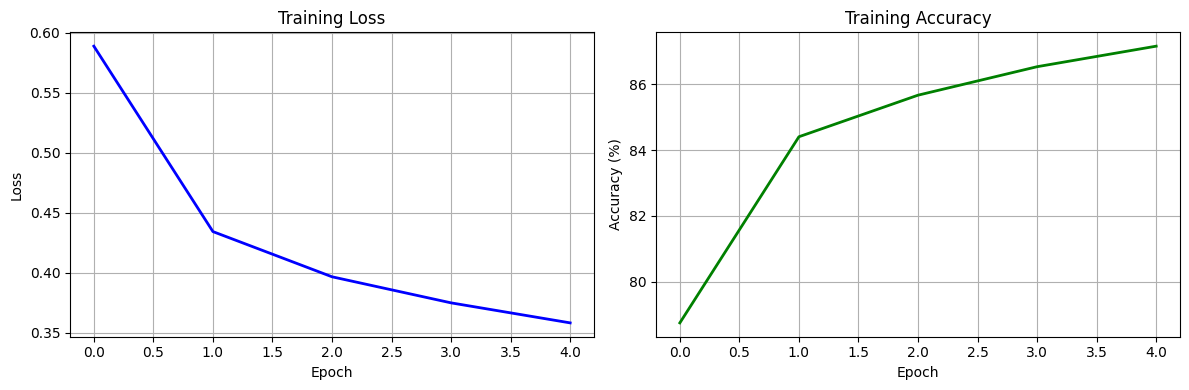

In [59]:
# Plot training curves
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Plot loss
ax1.plot(train_losses, 'b-', linewidth=2)
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.set_title('Training Loss')
ax1.grid(True)

# Plot accuracy
ax2.plot(train_accuracies, 'g-', linewidth=2)
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy (%)')
ax2.set_title('Training Accuracy')
ax2.grid(True)

plt.tight_layout()
plt.show()

### 2.5 Testing the Model

Now let's evaluate our model on the test set to see how well it generalizes to unseen data.

In [60]:
# Set model to evaluation mode (disables dropout, batch norm uses running stats)
model.eval()

test_loss = 0.0
correct = 0
total = 0

# We don't need to compute gradients during testing
with torch.no_grad():  # Disable gradient computation to save memory
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        
        # Calculate loss
        loss = criterion(outputs, labels)
        test_loss += loss.item()
        
        # Get predictions
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

# Calculate final test statistics
test_loss /= len(test_loader)
test_accuracy = 100 * correct / total

print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.2f}%')
print(f'Correct: {correct}/{total}')

Test Loss: 0.3662
Test Accuracy: 87.00%
Correct: 8700/10000


Let's visualize some predictions to see how well our model is performing:

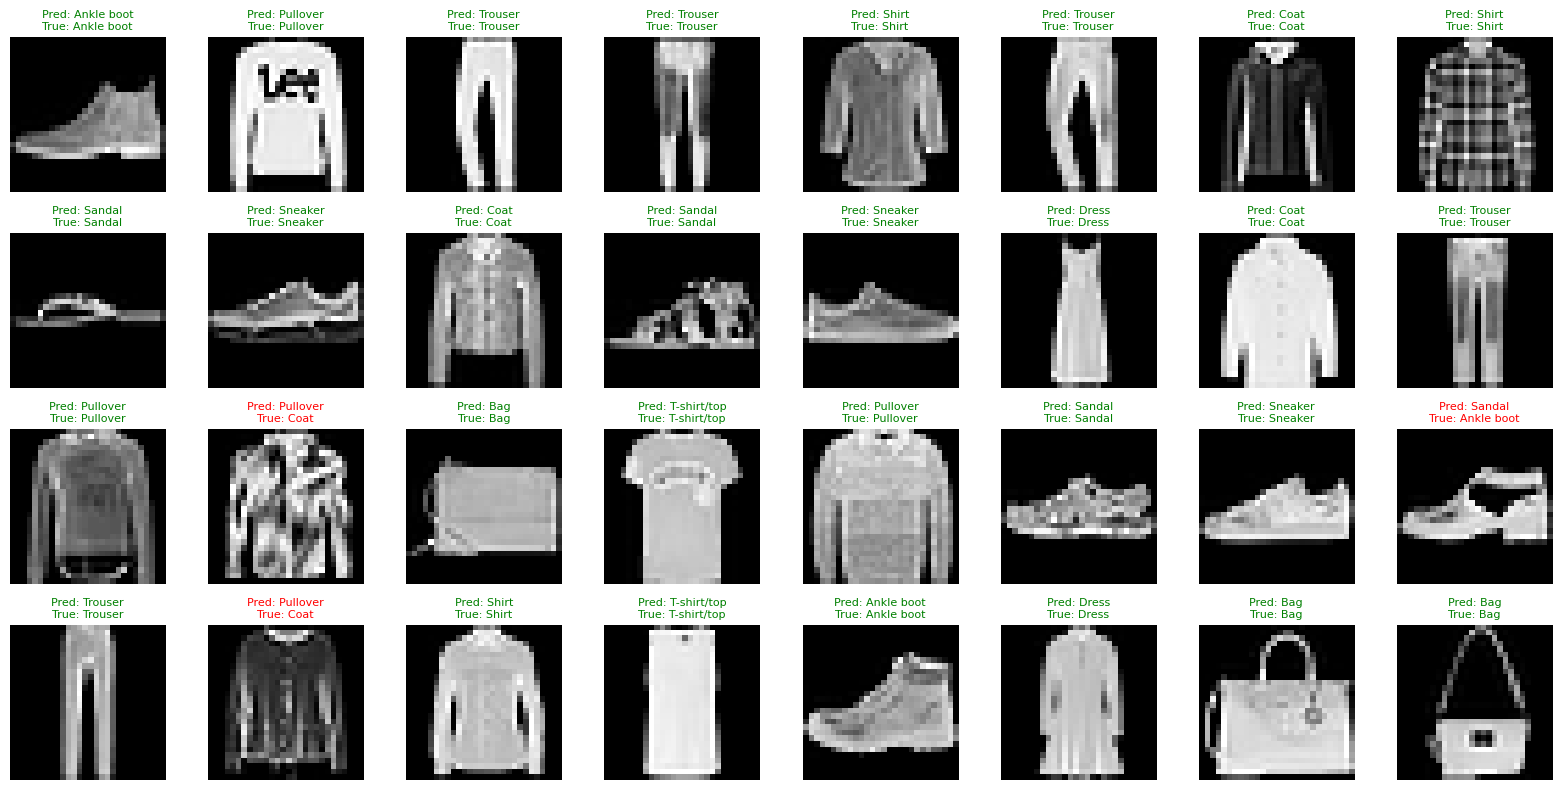

In [61]:
# Get a batch of test images
data_iter = iter(test_loader)
images, labels = next(data_iter)
images = images.to(device)

# Make predictions
model.eval()
with torch.no_grad():
    outputs = model(images)
    _, predicted = torch.max(outputs, 1)

# Move back to CPU for visualization
images = images.cpu()
predicted = predicted.cpu()

# Visualize predictions
fig, axes = plt.subplots(4, 8, figsize=(16, 8))
class_names = train_dataset.classes

for i in range(32):
    row, col = i // 8, i % 8
    
    # Denormalize image
    image = images[i] * 0.5 + 0.5
    image = image.squeeze().numpy()
    
    # Get prediction and true label
    pred_label = class_names[predicted[i]]
    true_label = class_names[labels[i]]
    
    # Color: green if correct, red if wrong
    color = 'green' if predicted[i] == labels[i] else 'red'
    
    axes[row, col].imshow(image, cmap='gray')
    axes[row, col].set_title(f'Pred: {pred_label}\nTrue: {true_label}', 
                            color=color, fontsize=8)
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()

### 2.6 Understanding the Model Architecture

Let's break down what happens in our neural network:

1. **Input**: 28×28 grayscale image (784 pixels)
2. **Flatten**: Convert 2D image to 1D vector
3. **Layer 1**: 784 → 128 neurons (with ReLU activation)
4. **Layer 2**: 128 → 64 neurons (with ReLU activation)  
5. **Output**: 64 → 10 neurons (one per class)

**Key Concepts:**
- **Fully Connected (Linear) Layers**: Every input neuron connects to every output neuron
- **ReLU Activation**: Introduces non-linearity (f(x) = max(0, x))
- **Dropout**: Randomly sets some neurons to 0 during training to prevent overfitting
- **Softmax**: Converts raw scores to probabilities (done automatically in CrossEntropyLoss)

In [62]:
# Let's trace through a single example to understand the forward pass
model.eval()
with torch.no_grad():
    # Get a single image
    single_image, single_label = test_dataset[0]
    single_image = single_image.unsqueeze(0).to(device)  # Add batch dimension
    
    print(f"Input shape: {single_image.shape}")
    print(f"True label: {class_names[single_label]}")
    
    # Forward pass
    output = model(single_image)
    
    # Apply softmax to get probabilities
    probabilities = F.softmax(output, dim=1)
    
    # Get predicted class
    _, predicted_idx = torch.max(output, 1)
    
    print(f"\nRaw output scores (logits):")
    for i, score in enumerate(output[0].cpu().numpy()):
        print(f"  {class_names[i]:15s}: {score:7.2f}")
    
    print(f"\nProbabilities (after softmax):")
    for i, prob in enumerate(probabilities[0].cpu().numpy()):
        print(f"  {class_names[i]:15s}: {prob*100:6.2f}%")
    
    print(f"\nPredicted class: {class_names[predicted_idx.item()]}")
    print(f"Confidence: {probabilities[0][predicted_idx].item()*100:.2f}%")

Input shape: torch.Size([1, 1, 28, 28])
True label: Ankle boot

Raw output scores (logits):
  T-shirt/top    :   -6.99
  Trouser        :  -11.09
  Pullover       :  -11.06
  Dress          :   -9.03
  Coat           :  -11.97
  Sandal         :    3.88
  Shirt          :   -7.26
  Sneaker        :    3.90
  Bag            :   -2.58
  Ankle boot     :    5.96

Probabilities (after softmax):
  T-shirt/top    :   0.00%
  Trouser        :   0.00%
  Pullover       :   0.00%
  Dress          :   0.00%
  Coat           :   0.00%
  Sandal         :   9.99%
  Shirt          :   0.00%
  Sneaker        :  10.22%
  Bag            :   0.02%
  Ankle boot     :  79.77%

Predicted class: Ankle boot
Confidence: 79.77%


---

## Summary: Building a Fully Connected Neural Network

**What we learned:**

1. **Data Loading**: 
   - Using `torchvision.datasets` for built-in datasets
   - `DataLoader` for efficient batch processing
   - Transformations for preprocessing

2. **Model Definition**:
   - Inherit from `nn.Module`
   - Define layers in `__init__`
   - Implement `forward()` method

3. **Training Loop**:
   - Forward pass → Compute loss → Backward pass → Update weights
   - Track metrics (loss, accuracy) over epochs

4. **Evaluation**:
   - Set model to `eval()` mode
   - Use `torch.no_grad()` to save memory
   - Calculate test accuracy

**Key PyTorch Concepts:**
- `nn.Module`: Base class for all neural network modules
- `nn.Linear`: Fully connected layer
- `F.relu()`: ReLU activation function
- `nn.CrossEntropyLoss`: Loss function for classification
- `optim.Adam`: Adaptive optimizer
- `model.train()` / `model.eval()`: Set training vs evaluation mode



---

## Part 3: Building a Convolutional Neural Network (CNN)

Now that we've built a fully connected neural network, let's explore **Convolutional Neural Networks (CNNs)**, which are specifically designed for image data.

### Why CNNs for Images?

**Fully Connected Networks (FCN) Limitations:**
- Treats each pixel independently
- Doesn't preserve spatial relationships
- Requires flattening, losing 2D structure
- Many parameters (109,386 for our FCN)

**CNN Advantages:**
- **Spatial awareness**: Understands that nearby pixels are related
- **Translation invariance**: Can recognize patterns regardless of position
- **Parameter sharing**: Same filter applied across the image (fewer parameters)
- **Hierarchical features**: Learns edges → textures → patterns → objects

### CNN Building Blocks

1. **Convolutional Layers**: Apply filters to detect features (edges, textures)
2. **Pooling Layers**: Reduce spatial dimensions (downsampling)
3. **Fully Connected Layers**: Final classification (like in Part 2)

### 3.1 Understanding Convolution Operations

**Convolution Formula:**
```
output_size = (input_size + 2*padding - kernel_size) / stride + 1
```

**Key Parameters:**
- **Kernel/Filter Size**: Size of the sliding window (e.g., 3×3, 5×5)
- **Stride**: How many pixels the filter moves each step (usually 1)
- **Padding**: Adding zeros around the image to preserve size

Let's visualize how convolution works:

In [63]:
# Example: Understanding convolution dimensions
# Input: 28×28 image
# Conv layer: kernel_size=3, padding=0, stride=1

input_size = 28
kernel_size = 3
padding = 0
stride = 1

# Calculate output size
output_size = (input_size + 2*padding - kernel_size) // stride + 1
print(f"Input size: {input_size}×{input_size}")
print(f"Kernel size: {kernel_size}×{kernel_size}")
print(f"Padding: {padding}, Stride: {stride}")
print(f"Output size: {output_size}×{output_size}")

# Example with padding to preserve size
padding_preserve = 1
output_size_padded = (input_size + 2*padding_preserve - kernel_size) // stride + 1
print(f"\nWith padding={padding_preserve} to preserve size:")
print(f"Output size: {output_size_padded}×{output_size_padded}")

Input size: 28×28
Kernel size: 3×3
Padding: 0, Stride: 1
Output size: 26×26

With padding=1 to preserve size:
Output size: 28×28


### 3.2 Building the CNN Model

We'll create a CNN with:
- **Conv Layer 1**: 1 channel → 16 feature maps (3×3 kernel)
- **Max Pooling**: Reduce size by half
- **Conv Layer 2**: 16 → 32 feature maps (3×3 kernel)
- **Max Pooling**: Reduce size by half again
- **Fully Connected Layers**: For final classification

**Visualization: Convolutional Neural Network (CNN) Architecture**

The following diagram illustrates the structure of a Convolutional Neural Network:

![CNN Architecture](NN_scratch/CNN.png)

This diagram shows how CNNs process images:
- **Convolutional Layers**: Apply filters to detect features (edges, textures, patterns)
- **Pooling Layers**: Reduce spatial dimensions while preserving important features
- **Fully Connected Layers**: Combine extracted features for final classification

Unlike MLPs, CNNs preserve spatial relationships and use parameter sharing, making them more efficient for image data.

### Alternative: Using nn.Sequential

PyTorch provides another way to define models using `nn.Sequential`, which is more compact for simple sequential architectures. Here's the same CNN model written using `nn.Sequential`:

**Note:** This is shown as an alternative approach

In [ ]:
# Alternative CNN model using nn.Sequential
# This is a more compact way to define sequential models
# Note: This cell is for demonstration - we'll use the explicit class above

class FashionMNIST_CNN_Sequential(nn.Module):
    """
    Same CNN architecture but using nn.Sequential for a more compact definition.
    
    Advantages of Sequential:
    - More concise for simple sequential models
    - Less code to write
    - Easier to read for linear architectures
    
    Disadvantages:
    - Less flexible (harder to add conditional logic)
    - Can't easily reuse layers
    - Harder to add custom operations between layers
    """
    
    def __init__(self, in_channels=1, num_classes=10):
        super(FashionMNIST_CNN_Sequential, self).__init__()
        
        # Define the entire model as a sequential pipeline
        self.model = nn.Sequential(
            # First convolutional block
            nn.Conv2d(in_channels=in_channels, out_channels=16, kernel_size=3, padding=1),
            # (1, 28, 28) -> (16, 28, 28) with padding=1
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            # (16, 28, 28) -> (16, 14, 14)
            
            # Second convolutional block
            nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=1),
            # (16, 14, 14) -> (32, 14, 14) with padding=1
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            # (32, 14, 14) -> (32, 7, 7)
            
            # Flatten the feature maps
            nn.Flatten(),  # (32, 7, 7) -> (32 * 7 * 7) = (1568,)
            
            # Fully connected layers
            nn.Linear(in_features=32 * 7 * 7, out_features=128),
            nn.ReLU(),
            nn.Dropout(0.25),  # Dropout for regularization
            
            # Output layer
            nn.Linear(in_features=128, out_features=num_classes)
        )
    
    def forward(self, x):
        """
        Forward pass - simply pass input through the sequential model.
        """
        return self.model(x)

# Example: Create and inspect the Sequential model
# Uncomment the lines below to see the Sequential model in action
# cnn_model_seq = FashionMNIST_CNN_Sequential(in_channels=1, num_classes=10).to(device)
# print("Sequential CNN Model:")
# print(cnn_model_seq)
# print("\nBoth approaches produce equivalent models!")

In [64]:
class FashionMNIST_CNN(nn.Module):
    """
    Convolutional Neural Network for Fashion-MNIST classification.
    
    Architecture:
    - Conv1: 1 → 16 channels, 3×3 kernel
    - Pool1: MaxPool 2×2 (28×28 → 14×14)
    - Conv2: 16 → 32 channels, 3×3 kernel  
    - Pool2: MaxPool 2×2 (14×14 → 7×7)
    - FC1: 32×7×7 = 1568 → 128 neurons
    - FC2: 128 → 10 neurons (output)
    """
    
    def __init__(self, num_classes=10):
        super(FashionMNIST_CNN, self).__init__()
        
        # Convolutional layers
        # Conv2d(in_channels, out_channels, kernel_size, stride=1, padding=0)
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=1)
        
        # Pooling layer (reduces spatial dimensions)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        
        # Fully connected layers
        # After 2 pooling operations: 28/2/2 = 7
        # So we have: 32 channels × 7 × 7 = 1568 features
        self.fc1 = nn.Linear(32 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, num_classes)
        
        # Dropout for regularization
        self.dropout = nn.Dropout(0.25)
    
    def forward(self, x):
        """
        Forward pass through the CNN.
        
        Args:
            x: Input tensor of shape [batch_size, 1, 28, 28]
        
        Returns:
            Output tensor of shape [batch_size, 10]
        """
        # First conv block: Conv → ReLU → Pool
        x = self.conv1(x)  # [batch, 1, 28, 28] → [batch, 16, 28, 28] (with padding=1)
        x = F.relu(x)
        x = self.pool(x)   # [batch, 16, 28, 28] → [batch, 16, 14, 14]
        
        # Second conv block: Conv → ReLU → Pool
        x = self.conv2(x)  # [batch, 16, 14, 14] → [batch, 32, 14, 14] (with padding=1)
        x = F.relu(x)
        x = self.pool(x)   # [batch, 32, 14, 14] → [batch, 32, 7, 7]
        
        # Flatten for fully connected layers
        x = x.view(-1, 32 * 7 * 7)  # [batch, 32, 7, 7] → [batch, 1568]
        
        # Fully connected layers
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)  # No activation - softmax applied in loss function
        
        return x

# Create CNN model
cnn_model = FashionMNIST_CNN(num_classes=10).to(device)
print(cnn_model)

# Count parameters
total_params = sum(p.numel() for p in cnn_model.parameters())
print(f"\nTotal parameters: {total_params:,}")

# Compare with fully connected network
print(f"FCN had: 109,386 parameters")
print(f"CNN has: {total_params:,} parameters")
print(f"Reduction: {(1 - total_params/109386)*100:.1f}% fewer parameters!")

FashionMNIST_CNN(
  (conv1): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=1568, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
  (dropout): Dropout(p=0.25, inplace=False)
)

Total parameters: 206,922
FCN had: 109,386 parameters
CNN has: 206,922 parameters
Reduction: -89.2% fewer parameters!


In [ ]:
# Test the model with a dummy input to verify dimensions
cnn_model.eval()
with torch.no_grad():
    test_input = torch.randn(1, 1, 28, 28).to(device)  # [batch=1, channels=1, height=28, width=28]
    output = cnn_model(test_input)
    print(f"Input shape: {test_input.shape}")
    print(f"Output shape: {output.shape}")
    print("✓ Model dimensions are correct!")

Input shape: torch.Size([1, 1, 28, 28])
Output shape: torch.Size([1, 10])
✓ Model dimensions are correct!


[W NNPACK.cpp:64] Could not initialize NNPACK! Reason: Unsupported hardware.


In [ ]:
# Test the model with a dummy input to verify dimensions
cnn_model.eval()
with torch.no_grad():
    test_input = torch.randn(1, 1, 28, 28).to(device)  # [batch=1, channels=1, height=28, width=28]
    output = cnn_model(test_input)
    print(f"Input shape: {test_input.shape}")
    print(f"Output shape: {output.shape}")
    print("✓ Model dimensions are correct!")

In [66]:
# Set up loss and optimizer for CNN
criterion_cnn = nn.CrossEntropyLoss()
optimizer_cnn = optim.Adam(cnn_model.parameters(), lr=0.001)

print("CNN Training Setup:")
print(f"Loss function: {criterion_cnn}")
print(f"Optimizer: Adam with lr=0.001")
print(f"Device: {device}")

CNN Training Setup:
Loss function: CrossEntropyLoss()
Optimizer: Adam with lr=0.001
Device: cpu


Now let's train the CNN. We'll use fewer epochs since CNNs typically converge faster:

In [67]:
# Training parameters
num_epochs_cnn = 5

# Track training progress
cnn_train_losses = []
cnn_train_accuracies = []

print("Starting CNN training...")
print("=" * 60)

for epoch in range(num_epochs_cnn):
    cnn_model.train()  # Set to training mode
    
    running_loss = 0.0
    correct = 0
    total = 0
    
    for batch_idx, (images, labels) in enumerate(train_loader):
        # Move data to device
        images = images.to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = cnn_model(images)
        loss = criterion_cnn(outputs, labels)
        
        # Backward pass
        optimizer_cnn.zero_grad()
        loss.backward()
        optimizer_cnn.step()
        
        # Track statistics
        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
        # Print progress
        if (batch_idx + 1) % 200 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs_cnn}], '
                  f'Batch [{batch_idx+1}/{len(train_loader)}], '
                  f'Loss: {loss.item():.4f}')
    
    # Calculate epoch statistics
    epoch_loss = running_loss / len(train_loader)
    epoch_accuracy = 100 * correct / total
    
    cnn_train_losses.append(epoch_loss)
    cnn_train_accuracies.append(epoch_accuracy)
    
    print(f'Epoch [{epoch+1}/{num_epochs_cnn}] - '
          f'Loss: {epoch_loss:.4f}, '
          f'Accuracy: {epoch_accuracy:.2f}%')
    print("-" * 60)

print("\nCNN Training completed!")

Starting CNN training...
Epoch [1/5], Batch [200/938], Loss: 0.6844
Epoch [1/5], Batch [400/938], Loss: 0.5629
Epoch [1/5], Batch [600/938], Loss: 0.4923
Epoch [1/5], Batch [800/938], Loss: 0.2782
Epoch [1/5] - Loss: 0.5200, Accuracy: 81.19%
------------------------------------------------------------
Epoch [2/5], Batch [200/938], Loss: 0.5197
Epoch [2/5], Batch [400/938], Loss: 0.5708
Epoch [2/5], Batch [600/938], Loss: 0.4728
Epoch [2/5], Batch [800/938], Loss: 0.1755
Epoch [2/5] - Loss: 0.3389, Accuracy: 87.78%
------------------------------------------------------------
Epoch [3/5], Batch [200/938], Loss: 0.4883
Epoch [3/5], Batch [400/938], Loss: 0.2607
Epoch [3/5], Batch [600/938], Loss: 0.1477
Epoch [3/5], Batch [800/938], Loss: 0.2208
Epoch [3/5] - Loss: 0.2908, Accuracy: 89.48%
------------------------------------------------------------
Epoch [4/5], Batch [200/938], Loss: 0.2540
Epoch [4/5], Batch [400/938], Loss: 0.3276
Epoch [4/5], Batch [600/938], Loss: 0.1743
Epoch [4/5],

Visualize the CNN training progress:

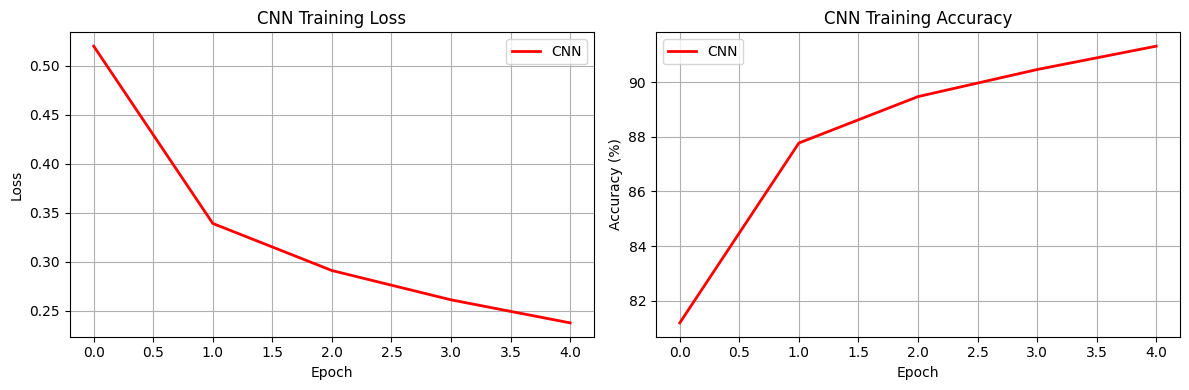

In [68]:
# Plot CNN training curves
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Plot loss
ax1.plot(cnn_train_losses, 'r-', linewidth=2, label='CNN')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.set_title('CNN Training Loss')
ax1.grid(True)
ax1.legend()

# Plot accuracy
ax2.plot(cnn_train_accuracies, 'r-', linewidth=2, label='CNN')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy (%)')
ax2.set_title('CNN Training Accuracy')
ax2.grid(True)
ax2.legend()

plt.tight_layout()
plt.show()

### 3.4 Testing the CNN

Let's evaluate the CNN on the test set:

In [69]:
# Evaluate CNN on test set
cnn_model.eval()
test_loss_cnn = 0.0
correct_cnn = 0
total_cnn = 0

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        
        outputs = cnn_model(images)
        loss = criterion_cnn(outputs, labels)
        
        test_loss_cnn += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total_cnn += labels.size(0)
        correct_cnn += (predicted == labels).sum().item()

test_loss_cnn /= len(test_loader)
test_accuracy_cnn = 100 * correct_cnn / total_cnn

print("=" * 60)
print("CNN Test Results:")
print(f"Test Loss: {test_loss_cnn:.4f}")
print(f"Test Accuracy: {test_accuracy_cnn:.2f}%")
print(f"Correct: {correct_cnn}/{total_cnn}")
print("=" * 60)

CNN Test Results:
Test Loss: 0.2623
Test Accuracy: 90.49%
Correct: 9049/10000


### 3.5 Comparing FCN vs CNN

Let's compare the performance of our Fully Connected Network and CNN:

MODEL COMPARISON: Fully Connected vs Convolutional
Metric                    FCN             CNN            
------------------------------------------------------------
Parameters                109,386         206,922
Final Train Accuracy      87.17%           91.33%
Test Accuracy             87.00%           90.49%
Test Loss                 0.3662           0.2623


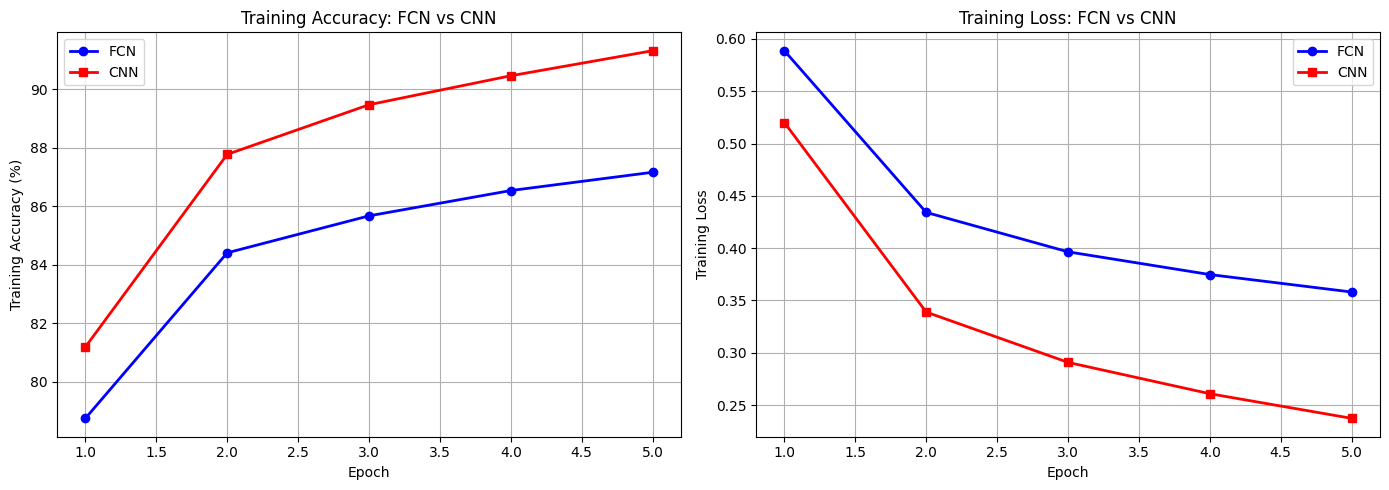

In [70]:
# Comparison table
print("=" * 60)
print("MODEL COMPARISON: Fully Connected vs Convolutional")
print("=" * 60)
print(f"{'Metric':<25} {'FCN':<15} {'CNN':<15}")
print("-" * 60)
print(f"{'Parameters':<25} {'109,386':<15} {sum(p.numel() for p in cnn_model.parameters()):,}")
print(f"{'Final Train Accuracy':<25} {train_accuracies[-1]:.2f}%{'':<10} {cnn_train_accuracies[-1]:.2f}%")
print(f"{'Test Accuracy':<25} {test_accuracy:.2f}%{'':<10} {test_accuracy_cnn:.2f}%")
print(f"{'Test Loss':<25} {test_loss:.4f}{'':<10} {test_loss_cnn:.4f}")
print("=" * 60)

# Visualize comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Accuracy comparison
epochs = range(1, len(train_accuracies) + 1)
epochs_cnn = range(1, len(cnn_train_accuracies) + 1)
ax1.plot(epochs, train_accuracies, 'b-o', label='FCN', linewidth=2, markersize=6)
ax1.plot(epochs_cnn, cnn_train_accuracies, 'r-s', label='CNN', linewidth=2, markersize=6)
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Training Accuracy (%)')
ax1.set_title('Training Accuracy: FCN vs CNN')
ax1.legend()
ax1.grid(True)

# Loss comparison
ax2.plot(epochs, train_losses, 'b-o', label='FCN', linewidth=2, markersize=6)
ax2.plot(epochs_cnn, cnn_train_losses, 'r-s', label='CNN', linewidth=2, markersize=6)
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Training Loss')
ax2.set_title('Training Loss: FCN vs CNN')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

Let's visualize some CNN predictions:

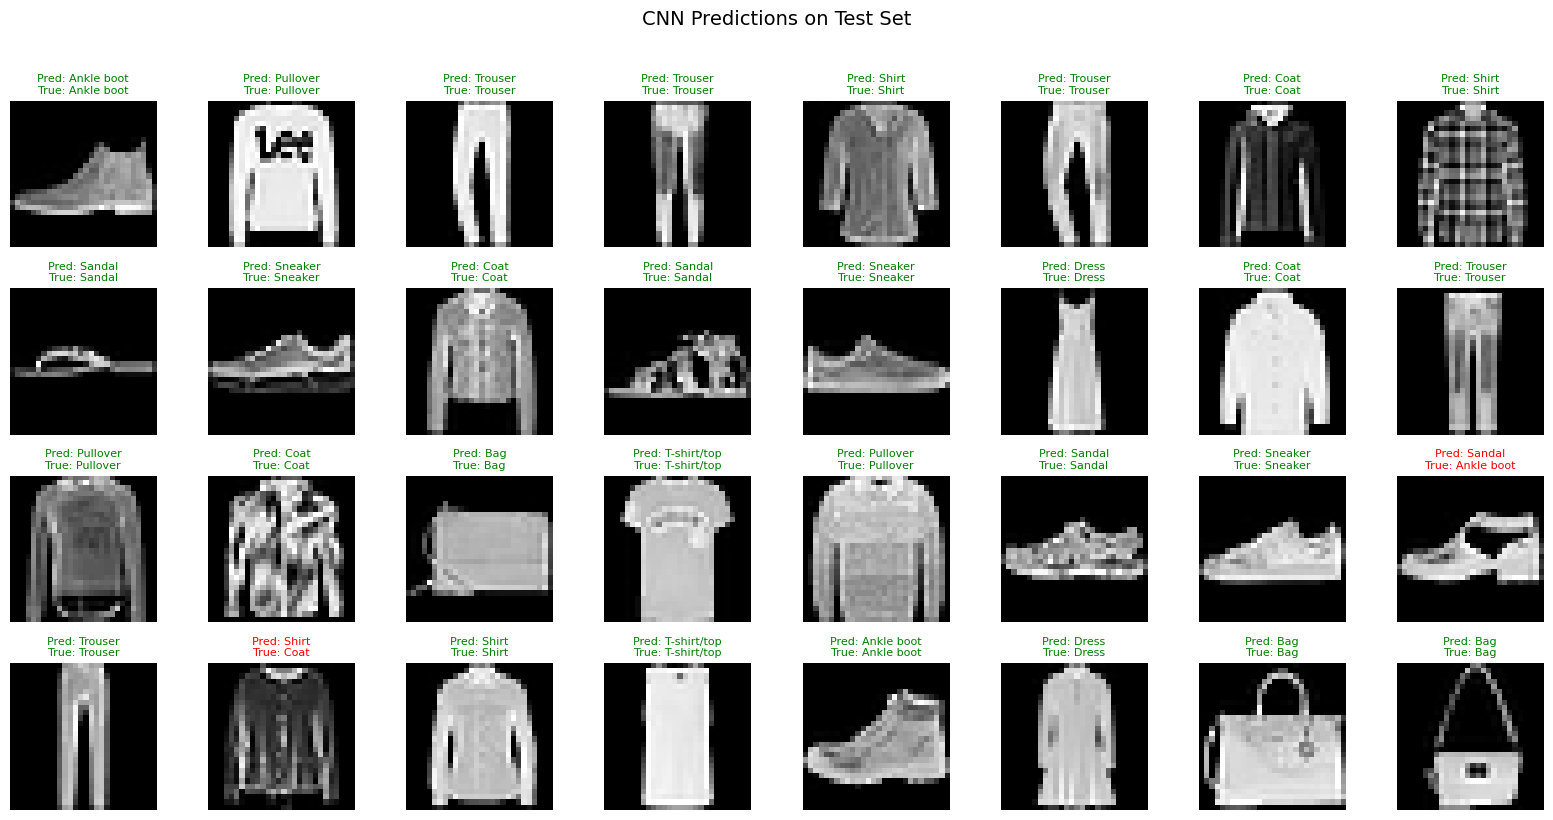

In [71]:
# Visualize CNN predictions
data_iter = iter(test_loader)
images, labels = next(data_iter)
images = images.to(device)

cnn_model.eval()
with torch.no_grad():
    outputs = cnn_model(images)
    _, predicted = torch.max(outputs, 1)

images = images.cpu()
predicted = predicted.cpu()

# Visualize predictions
fig, axes = plt.subplots(4, 8, figsize=(16, 8))
class_names = train_dataset.classes

for i in range(32):
    row, col = i // 8, i % 8
    
    # Denormalize image
    image = images[i] * 0.5 + 0.5
    image = image.squeeze().numpy()
    
    # Get prediction and true label
    pred_label = class_names[predicted[i]]
    true_label = class_names[labels[i]]
    
    # Color: green if correct, red if wrong
    color = 'green' if predicted[i] == labels[i] else 'red'
    
    axes[row, col].imshow(image, cmap='gray')
    axes[row, col].set_title(f'Pred: {pred_label}\nTrue: {true_label}', 
                            color=color, fontsize=8)
    axes[row, col].axis('off')

plt.suptitle('CNN Predictions on Test Set', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

### 3.6 Understanding CNN Architecture

**Key Differences from Fully Connected Networks:**

1. **Convolutional Layers** (`nn.Conv2d`):
   - Apply learnable filters that slide across the image
   - Detect local patterns (edges, textures)
   - Share parameters across spatial locations

2. **Pooling Layers** (`nn.MaxPool2d`):
   - Reduce spatial dimensions (downsampling)
   - Makes the model more robust to small translations
   - Reduces computational cost

3. **Feature Maps**:
   - Each convolutional layer produces multiple feature maps
   - Early layers detect simple features (edges)
   - Later layers detect complex patterns (shapes, objects)

**Why CNNs Work Better for Images:**
- **Spatial locality**: Nearby pixels are more related than distant ones
- **Translation invariance**: A shoe is a shoe regardless of position
- **Parameter efficiency**: Fewer parameters than fully connected networks
- **Hierarchical learning**: Builds complex features from simple ones

In [73]:
# Let's trace through a single example to see the CNN forward pass
cnn_model.eval()
with torch.no_grad():
    # Get a single test image
    single_image, single_label = test_dataset[0]
    single_image = single_image.unsqueeze(0).to(device)
    
    print(f"Input shape: {single_image.shape}")
    print(f"True label: {class_names[single_label]}")
    
    # Forward pass
    output = cnn_model(single_image)
    
    # Apply softmax to get probabilities
    probabilities = F.softmax(output, dim=1)
    
    # Get predicted class
    _, predicted_idx = torch.max(output, 1)
    
    print(f"\nRaw output scores (logits):")
    for i, score in enumerate(output[0].cpu().numpy()):
        print(f"  {class_names[i]:15s}: {score:7.2f}")
    
    print(f"\nProbabilities (after softmax):")
    for i, prob in enumerate(probabilities[0].cpu().numpy()):
        print(f"  {class_names[i]:15s}: {prob*100:6.2f}%")
    
    print(f"\nPredicted class: {class_names[predicted_idx.item()]}")
    print(f"Confidence: {probabilities[0][predicted_idx].item()*100:.2f}%")

Input shape: torch.Size([1, 1, 28, 28])
True label: Ankle boot

Raw output scores (logits):
  T-shirt/top    :   -6.47
  Trouser        :   -7.54
  Pullover       :   -6.00
  Dress          :   -4.45
  Coat           :  -10.80
  Sandal         :    0.78
  Shirt          :   -6.90
  Sneaker        :    2.22
  Bag            :   -6.92
  Ankle boot     :    9.22

Probabilities (after softmax):
  T-shirt/top    :   0.00%
  Trouser        :   0.00%
  Pullover       :   0.00%
  Dress          :   0.00%
  Coat           :   0.00%
  Sandal         :   0.02%
  Shirt          :   0.00%
  Sneaker        :   0.09%
  Bag            :   0.00%
  Ankle boot     :  99.89%

Predicted class: Ankle boot
Confidence: 99.89%


---

## Summary: Building a Convolutional Neural Network

**What we learned:**

1. **CNN Architecture**:
   - Convolutional layers for feature detection
   - Pooling layers for dimensionality reduction
   - Fully connected layers for classification

2. **Key Advantages of CNNs**:
   - Better performance on image data
   - Fewer parameters than fully connected networks
   - Spatial awareness and translation invariance
   - Hierarchical feature learning

3. **PyTorch CNN Components**:
   - `nn.Conv2d`: 2D convolution layer
   - `nn.MaxPool2d`: Max pooling layer
   - `F.relu()`: ReLU activation
   - Same training loop as FCN (forward → loss → backward → update)

**Key Concepts:**
- **Convolution**: Sliding filters across the image to detect patterns
- **Pooling**: Downsampling to reduce dimensions and increase robustness
- **Feature Maps**: Output channels from convolutional layers
- **Parameter Sharing**: Same filter applied across all spatial locations

**Comparison Results:**
- CNNs typically achieve **higher accuracy** with **fewer parameters**
- Better suited for image classification tasks
- Faster convergence during training
Explore transfer learning with pre-trained models